In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Potentially useful astropy stuff
import astropy
import astropy.io.ascii as ascii
from astropy.table import Table
from astropy.io import fits
from astropy.stats import LombScargle
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip
from astropy.modeling import powerlaws
from astropy import constants as const
from astropy import units as u

#For reading in and organizing data
import pandas as pd
import requests
import json

#Misc
import scipy
from scipy import stats
from scipy.optimize import curve_fit
from collections import Counter
import itertools
from sklearn.preprocessing import scale
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
#Making Figures look nice
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12

In [3]:
bjds = np.load('Data/bjds.npy')
fluxes = np.load('Data/fluxes.npy')
fluxerrs = np.load('Data/fluxerrs.npy')
postfluxes200 = np.load('Data/processed_lcs_200pc.npy')
postfluxes200 = postfluxes200/postfluxes200.std(axis=0)

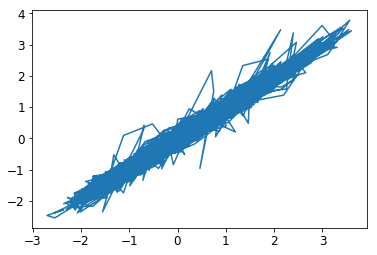

In [4]:
postfluxes1000= np.load('Data/processed_lcs_1000pc.npy')
postfluxes1000 = postfluxes1000/postfluxes1000.std(axis=0)
plt.plot(postfluxes200[0], postfluxes1000[0])

0.9975901734029855 1.075976576542995
1.0136242057371572 0.9594657937030088
0.9956565269408592 1.0054063979318493
1.0307454122628368 0.8989933191084925
1.0883649184246982 0.7517155287116075
0.9890280188254201 1.0021705062336077
0.9992861990050538 1.1355072889674171
0.9999159250373761 0.891504229791255
1.00438843913475 0.9384458637219876


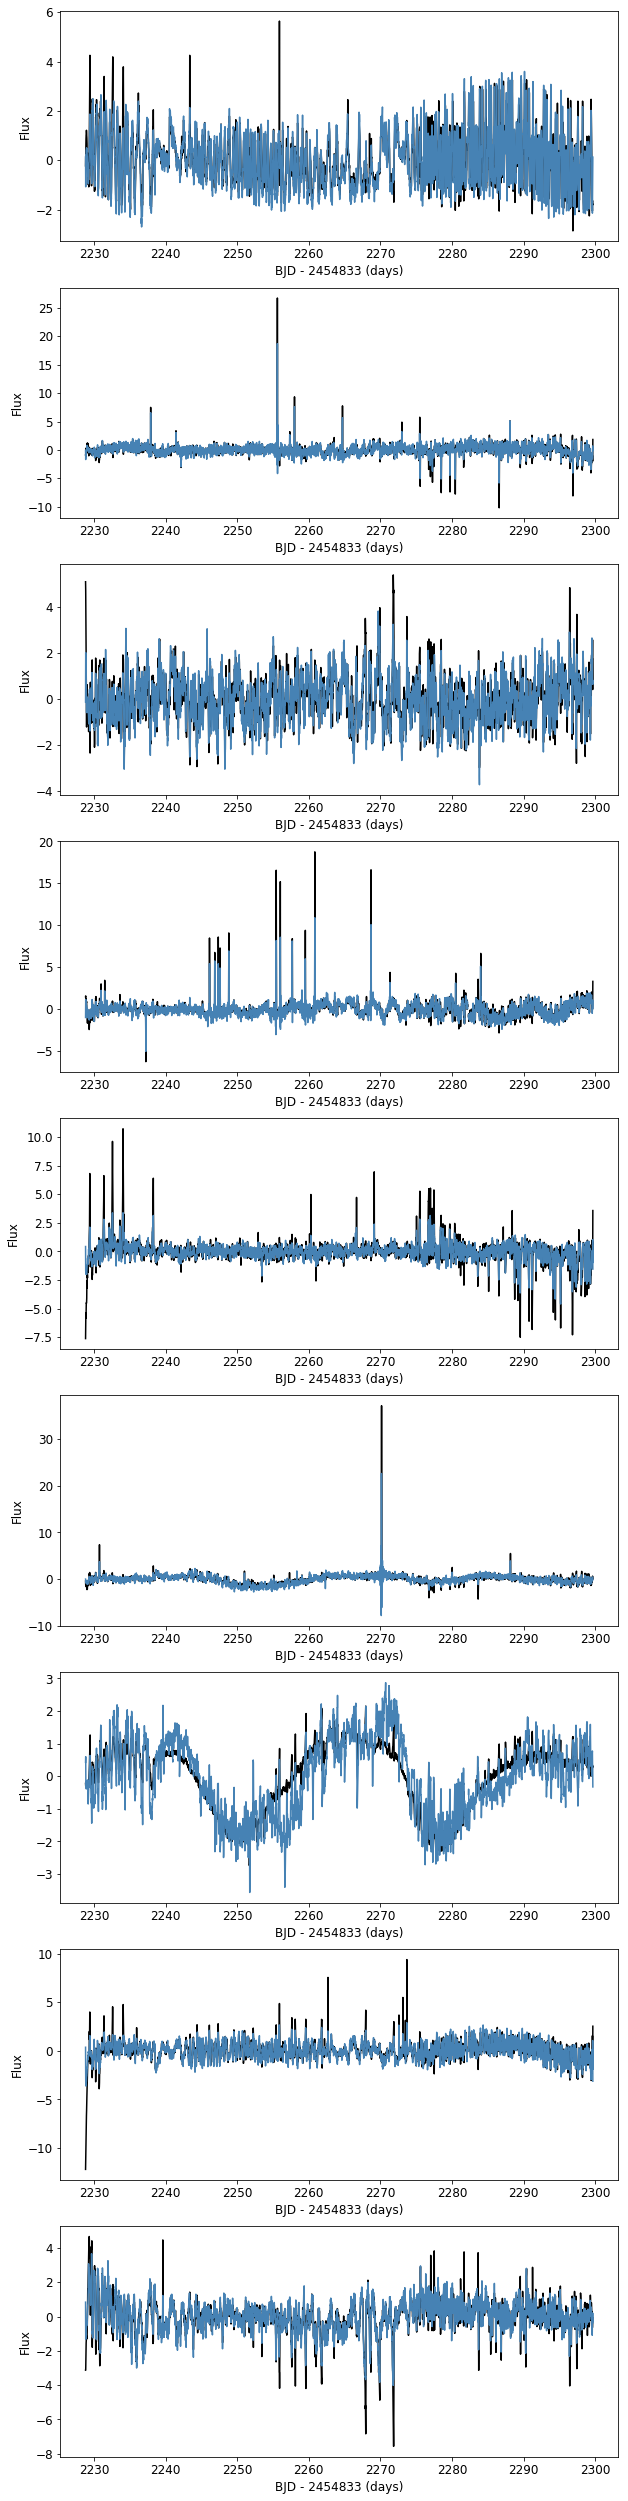

In [5]:
fig, axes = plt.subplots(9, figsize=(10,45))
p = 0
for i in range(0,900,100):
  #fluxes[i] = (fluxes[i] - np.nanmean(fluxes[i])) / np.nanstd(fluxes[i])
  axes[p].plot(bjds[i][:-1], fluxes[i][:-1], c='k')
  print(fluxes[i][:-1].std(), postfluxes200[i][:-1].std())

  axes[p].plot(bjds[i][:-1], postfluxes200[i], c='SteelBlue')
  axes[p].set_ylabel('Flux')
  axes[p].set_xlabel('BJD - 2454833 (days)')
  p += 1

0.9975901734029855 1.0606054399370715
1.0136242057371572 0.9760007629456364
0.9956565269408592 1.0401014882505626
1.0307454122628368 0.9192832051447862
1.0883649184246982 0.7910120016136906
0.9890280188254201 1.001076343223374
0.9992861990050538 1.1078211189956186
0.9999159250373761 0.9333503368605228
1.00438843913475 0.9356060297041399


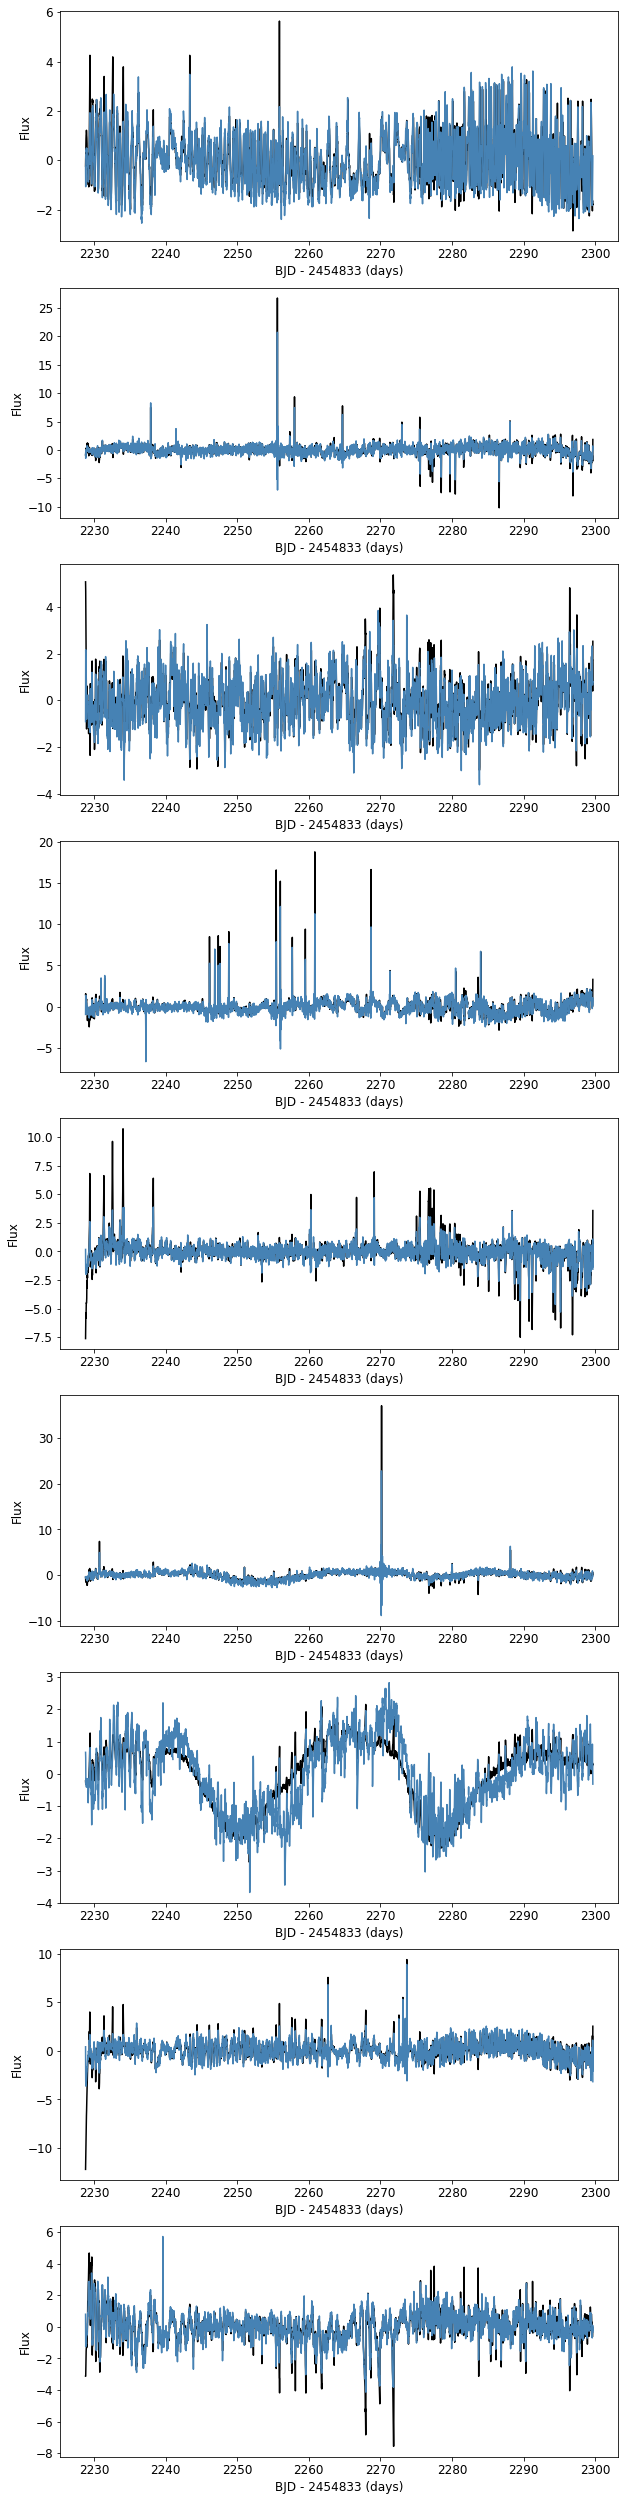

In [6]:
fig, axes = plt.subplots(9, figsize=(10,45))
p = 0
for i in range(0,900,100):
  #fluxes[i] = (fluxes[i] - np.nanmean(fluxes[i])) / np.nanstd(fluxes[i])
  axes[p].plot(bjds[i][:-1], fluxes[i][:-1], c='k')
  print(fluxes[i][:-1].std(), postfluxes1000[i][:-1].std())

  axes[p].plot(bjds[i][:-1], postfluxes1000[i], c='SteelBlue')
  axes[p].set_ylabel('Flux')
  axes[p].set_xlabel('BJD - 2454833 (days)')
  p += 1

In [7]:
def plotme(time1, flux1norm, Filtered_signal1, style=None, sig2 = None, xmin=None, xmax=None, ymin=None, ymax=None):
    fig = plt.figure(figsize=(10,5))
  
    res = flux1norm - Filtered_signal1
    left, width = 0.1, 1.32
    if not sig2 is None:
        fig = plt.figure(figsize=(20,5))
        res2 = flux1norm - sig2
        left, width = 0.1, 0.66
    bottom, height = 0.1, 0.66

    rect_scatter1 = [left, bottom + 0.2, width/2, height]
    rect_histx1 = [left, bottom, width/2, 0.2]
    
    if not sig2 is None:
        rect_scatter2 = [left+width/2, bottom + 0.2, width/2, height]
        rect_histx2 =[left+width/2, bottom, width/2, 0.2]
    plt.subplots_adjust(hspace=0., wspace=0.1)
    ax1 = plt.axes(rect_scatter1)
    axres1 = plt.axes(rect_histx1)
    
    if not sig2 is None:
        ax2 = plt.axes(rect_scatter2)
        axres2 = plt.axes(rect_histx2)
    ax1.minorticks_on()
    axres1.minorticks_on()
    
    if not sig2 is None:
        ax2.minorticks_on()
        axres2.minorticks_on()
        plt.setp(ax2.get_xticklabels(),
             visible=False)
        ax2.yaxis.tick_right()
        axres2.yaxis.tick_right()

    if style == 'line':
        
        ax1.plot(time1, flux1norm, color='black', alpha=0.75, label='Original')
        ax1.plot(time1, Filtered_signal1, color='SteelBlue', lw=3, alpha=0.75, label='Processed')
        
    if not style == 'line':

        ax1.errorbar(time1, flux1norm, color='SteelBlue', alpha=1,
                                 marker='.', fmt='.', label='Original')
        ax1.errorbar(time1, Filtered_signal1,
                                 color='DarkOrange', alpha=0.25,
                                 marker='.', fmt='.', label='Processed')
    ax1.set_ylabel('Standarized Flux')
    ax1.legend(fontsize=12)
    ax1.set_xticks([])

    axres1.plot(time1, res, color='k', alpha=0.5)
    axres1.set_ylabel('Residuals')
    axres1.set_xlabel('BJD - 2454833 (days)')
    
    if not sig2 is None:
        ax2.errorbar(time1, flux1norm, color='SteelBlue', alpha=1,
                                 marker='.', fmt='.', label='Original')
        ax2.errorbar(time1, sig2,
                                 color='DarkOrange', alpha=0.25,
                                 marker='.', fmt='.', label='Processed')
    
        ax2.legend(fontsize=12)

        axres2.plot(time1, res2, color='k', alpha=0.5)
    
    if xmin is None:
        xmin=time1[0]
    if xmax is None:
        xax=time1[-1]
            
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin,ymax)
    axres1.set_xlim(xmin, xmax)
    axres1.set_ylim(ymin, ymax)
    
    if not sig2 is None:
        ax2.set_xlim(xmin, xmax)
        #ax1.set_ylim(-2,2)
        axres2.set_xlim(xmin, xmax)
  

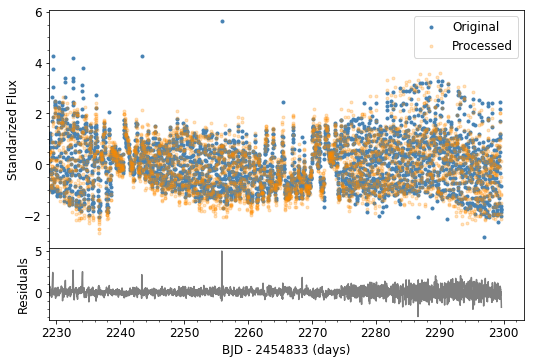

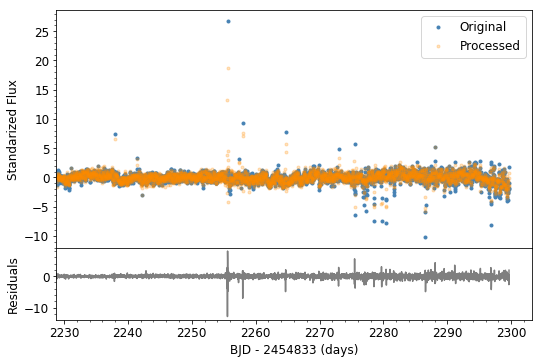

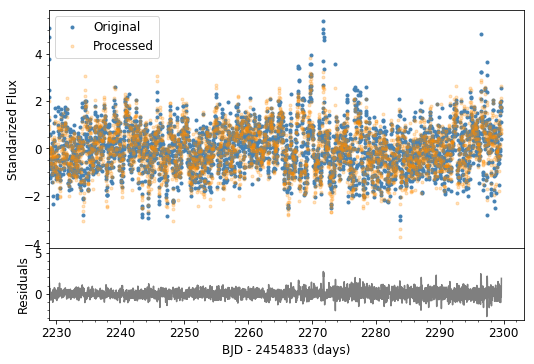

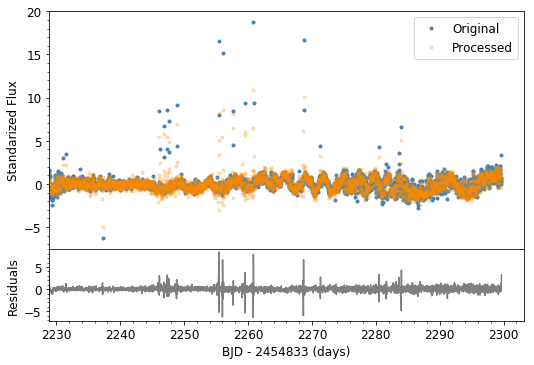

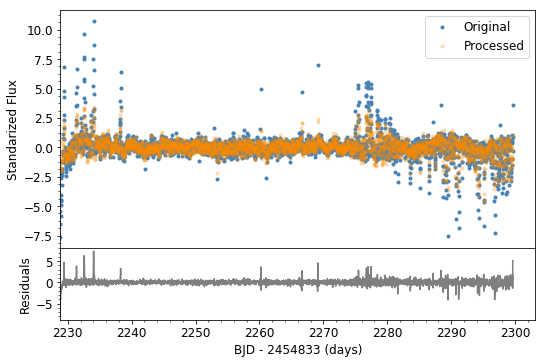

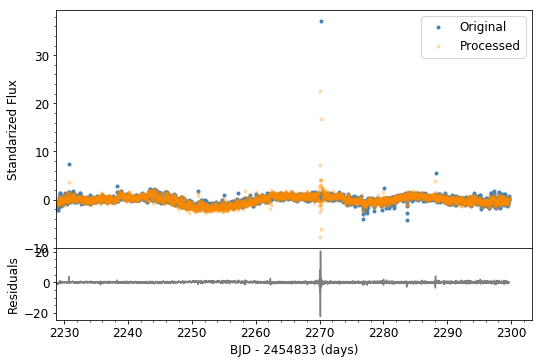

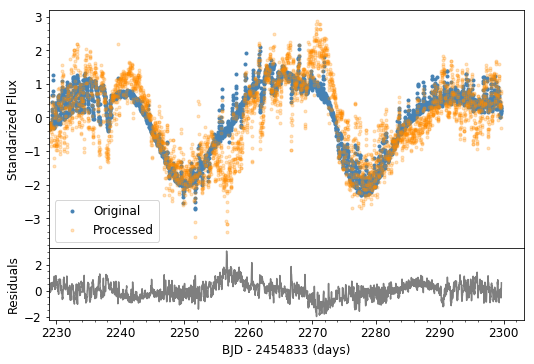

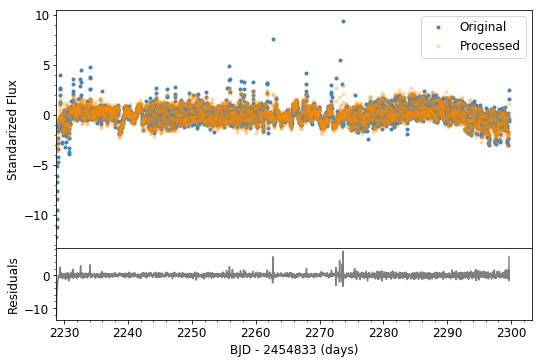

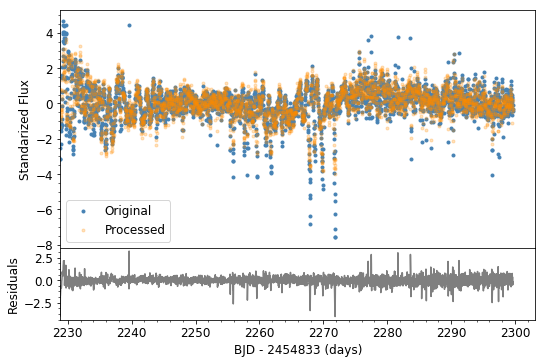

In [8]:
for  i in range(0,900,100):
    
    plotme(bjds[i][:-1], fluxes[i][:-1], postfluxes200[i])

In [9]:
import pandas as pd
pcacoefs = pd.read_csv("Data/coeffs.csv")
pcacoefs.head()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5
0,0,0.037755,0.043406,-0.003863,-0.032495,-0.004479
1,1,0.026269,-0.000337,-0.038874,-0.048884,-0.020208
2,2,0.029975,-0.005274,-0.038515,-0.021123,0.013898
3,3,0.031498,0.000082,0.012302,-0.049789,-0.031301
4,4,0.027876,0.105999,-0.007031,0.032938,0.026401


/Users/Riley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/Riley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


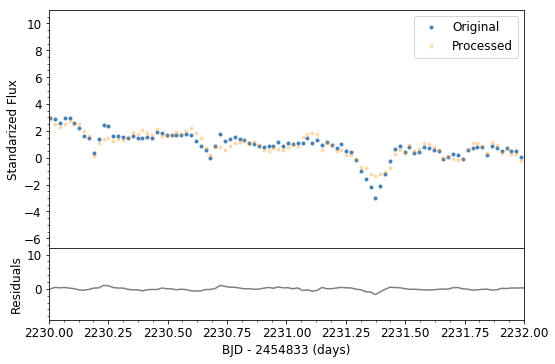

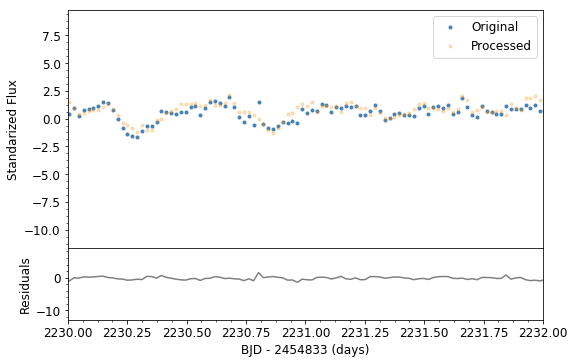

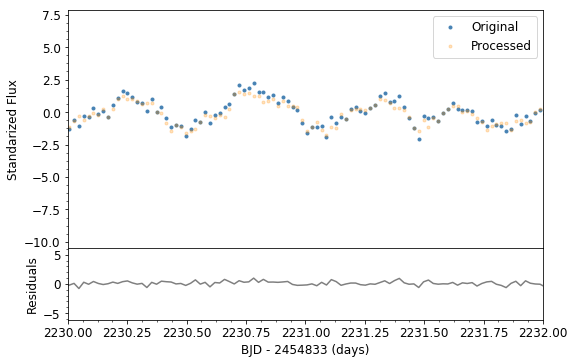

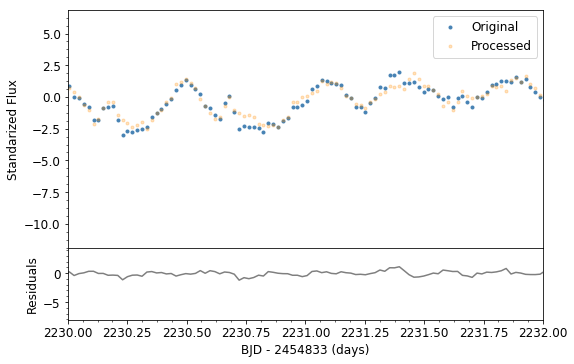

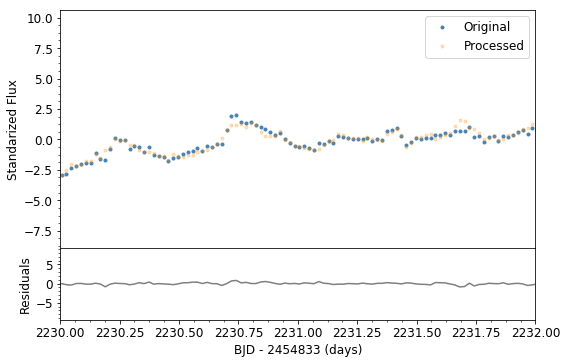

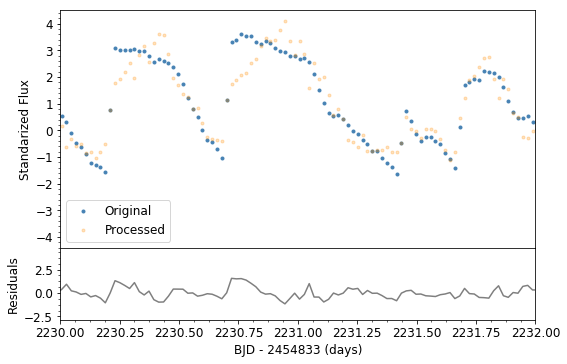

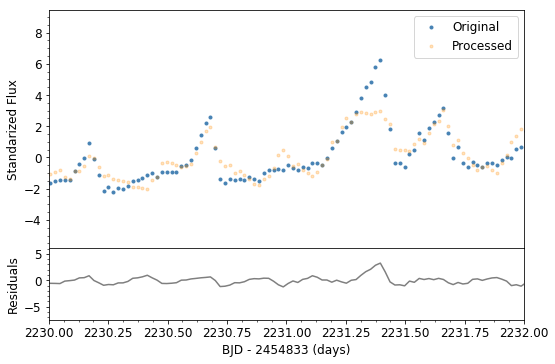

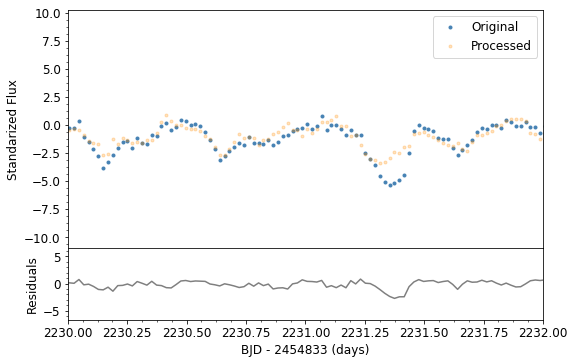

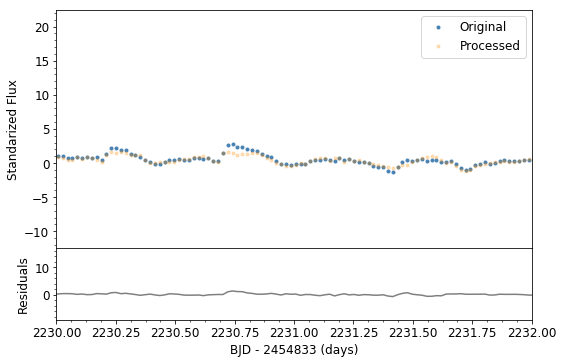

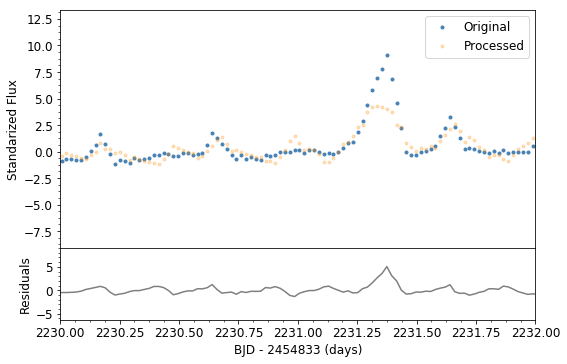

In [10]:
for i in pcacoefs.sort_values(["pc1","pc2"], ascending=False).index[:10]:
    plotme(bjds[i][:-1], fluxes[i][:-1], postfluxes200[i], postfluxes1000[i], 
           xmin=2230, xmax=2232)
    

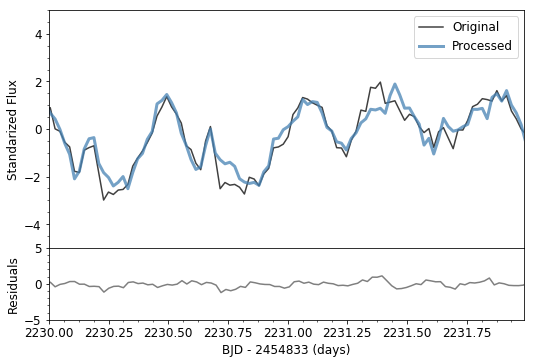

In [11]:
plotme(bjds[982][:-1], fluxes[982][:-1], postfluxes200[982], style='line', xmin=2230, xmax=2232, ymin=-5,ymax=5)
plt.xlim(2230,2231.99)
plt.savefig('Figures/lc_comp_resids.png', dpi=300, bbox_inches='tight')

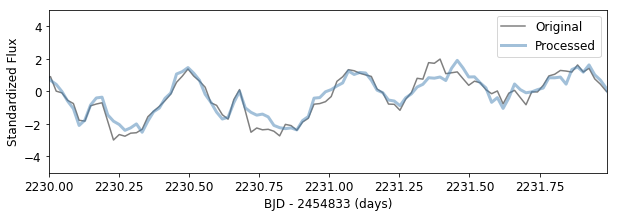

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
plt.plot(bjds[982][:-1], fluxes[982][:-1], c='k', alpha=0.5, label='Original')
plt.plot(bjds[982][:-1], postfluxes200[982], c='SteelBlue', lw=3, alpha=0.5, label='Processed')
plt.xlim(2230,2231.99)
plt.ylim(-5,5)
ax.set_ylabel('Standardized Flux')
ax.set_xlabel('BJD - 2454833 (days)')
plt.legend()
plt.savefig('Figures/lc_comp.png', dpi=300, bbox_inches='tight')